In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

In [ ]:
#This line is required to display visualizations in the browser
%matplotlib inline

In [ ]:
from skimage import data
from skimage.color import rgb2gray
from PIL import Image

In [ ]:
# importing tools for having interactive UI for user in browser
from ipywidgets import interact,interactive,interact_manual

Now, we have "gray_images", a dictionary that stores the matric associated with each image after converting to greyscale. Each time a new image is loaded, its appended to this dictionary before use

In [ ]:
gray_images = {
        "wallpaper2"  : np.array(Image.open("wallpaper2.jpg").convert('L'))
}

def showSourceImage(img_name):
        plt.imshow(gray_images[img_name])

In [ ]:
interact(showSourceImage, img_name=list(gray_images.keys()))

In [ ]:
# python module that performs SVD
from numpy.linalg import svd

In [ ]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, 1D array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    return reconst_matrix,s

The following function returns the number of singular values present after performing SVD along with the maximum and minimum singular values among them

In [ ]:
def getSingularValInfo(image):
    U,s,V = svd(image,full_matrices=False)
    return len(s), s[0], s[-1]

In [ ]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)

    if k != 0:
        print("k = "+str(k) + "\nMaxSV = " + str(round(s[0],4)) + "\nMinSV = " + str(round(s[k-1],4)))
    else:
        print("k = 0")

    # Find MSE
    sumOfSqOfSVDs = sum(s[i]*s[i] for i in range(k,len(s)))
    MSE = sumOfSqOfSVDs/len(s)
    print("MSE = " + str(round(MSE,4)))
    # compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    # print("compression Ratio = " + str(compression_ratio))
    
    plt.imshow(X=reconst_img, cmap='gray')

Modify the path to the image file as well as the image name as per our choice. If the image is used for the first time, its appended to the 'gray_images' dictionary along with its matric

In [87]:
path = "./"
fileName_ext = "wallpaper2.jpg"
fileName = fileName_ext.split('.')[0]
pic = Image.open(path + fileName_ext)
print("Current Image size = " + str(pic.size))
if(pic.size != (640,320)):
    ans = input("Do you wish to resize the image to 640x320?(y/n)")
    if(ans == 'y'):
        newPic = pic.resize((640,320))
    else:
        newPic = pic

gray_images.update({fileName : np.array(newPic.convert('L'))})

Current Image size = (1024, 768)


In [88]:
(numberOfSVs, maxVal, minVal)= getSingularValInfo(gray_images[fileName])
print("Source image SVD information:\nSingular Values = " + str(numberOfSVs))
print("MaxVal = " + str(round(maxVal,4)))
print("MinVal = " + str(round(minVal,4)))

Source image SVD information:
Singular Values = 768
MaxVal = 62604.888
MinVal = 18.4402


call the compress_show_gray_images() with different values of k and notice the differences where 'k' is the number of singular values that is considered while performing the low rank approximation of the image matric for image compression. The Mean Squared error is also calculated by dividing the square of singular values left out by total number of singular values

k = 20
MaxSV = 62604.888
MinSV = 3375.1897
MSE = 617652.4331


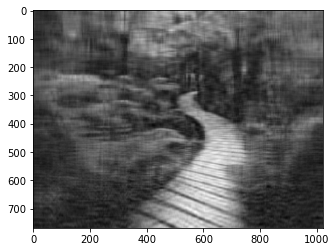

In [89]:
compress_show_gray_images(img_name=fileName, k=20)

For the ease of performing the effect of k or the number of singular values chosen, while compressing the image, we have added an interactive widget that could be accessed from the jupyterLab when opened from the browser. It provides a slider that allows user to change the value of 'k' dynamically and see the effect

k = 384
MaxSV = 62604.888
MinSV = 344.6251
MSE = 16246.1213


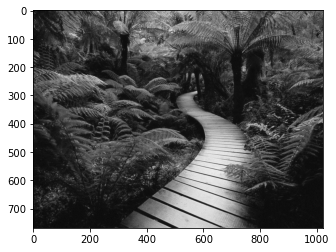

In [90]:
interact(compress_show_gray_images,img_name=fileName,k=(1,numberOfSVs));